I decided to do all mathematical calculations in Python as I believe it reduces space and also makes things neater.
I printed the results also of each calculation in order to check to see if my code was correct and to also help visualise what data I am working with. The same logic applies to the graphs produced.
Please note these are my calculations for the first iteration of my project. The second iteration is linked seperately as well as the code written to harvest any data.

In [34]:
#Hyundai Tucson 2022 IVXN4 : 235/55R19
#This code helps extract the specifications from a tyre marking
lst = [] 
hyundai_tucson = '235/55R19'
for num in hyundai_tucson:
    if num.isdigit():
        lst.append(num)
    else:
        pass

aspect_ratio = lst[3:5]
aspect_ratio = int("".join(map(str, aspect_ratio)))


tyre_width = lst[0:3]
tyre_width = int("".join(map(str, tyre_width)))

rim_diameter = lst[5:7]
rim_diameter = (int("".join(map(str,rim_diameter)))*25.4)

tyre_sidewall_height = ((aspect_ratio*tyre_width)/100)
wheel_diameter = (rim_diameter + (2*tyre_sidewall_height))
radius_wheel = ((0.95 * (wheel_diameter/2))/1000)
print(f"Radius of wheel in metres: {radius_wheel}")

Radius of wheel in metres: 0.3520224999999999


In [38]:
import math
rpm_lst = list(map(str,range(0,4501,50)))
rpm_lst[0:] = map(int,rpm_lst[0:])
lst = []
for i in rpm_lst:
    i = int(i)
    revolutions_per_minute = i
    radius_wheel = radius_wheel
    final_drive_ratio = 4.85
    
    if i < 2000:
        gearbox_ratio = 3.93 #1st gear
    elif i >= 2000 and i < 2500:
        gearbox_ratio = 2.18 #Mean of 2nd and 3rd gear (2.32, 2.04 respectively)
    elif i >=2500 and i < 3000:
        gearbox_ratio = 0.945 #Mean of 4th and 5th gear (1.07, 0.82 respectively)
    elif i >=3000 and i <= 3500:
        gearbox_ratio = 0.88 #6th gear
    else:
        pass
    
    engine_speed = ((revolutions_per_minute*math.pi*radius_wheel*3.6 )/(30*gearbox_ratio*final_drive_ratio)) #in kmhr**-1
    engine_speed*= 1/3.6
    lst.append(engine_speed)
    
print(f"List of engine speeds: \n{lst}")


List of engine speeds: 
[0.0, 0.09670184411901689, 0.19340368823803378, 0.29010553235705067, 0.38680737647606755, 0.48350922059508444, 0.5802110647141013, 0.676912908833118, 0.7736147529521351, 0.870316597071152, 0.9670184411901689, 1.0637202853091858, 1.1604221294282027, 1.2571239735472195, 1.353825817666236, 1.4505276617852534, 1.5472295059042702, 1.6439313500232868, 1.740633194142304, 1.8373350382613207, 1.9340368823803378, 2.030738726499355, 2.1274405706183717, 2.2241424147373885, 2.3208442588564053, 2.4175461029754217, 2.514247947094439, 2.6109497912134563, 2.707651635332472, 2.8043534794514895, 2.9010553235705068, 2.997757167689523, 3.0944590118085404, 3.1911608559275573, 3.2878627000465737, 3.3845645441655914, 3.481266388284608, 3.5779682324036246, 3.6746700765226414, 3.771371920641659, 6.9731788511511255, 7.147508322429903, 7.321837793708681, 7.496167264987459, 7.670496736266238, 7.844826207545016, 8.019155678823795, 8.193485150102571, 8.367814621381351, 8.542144092660129, 20.1

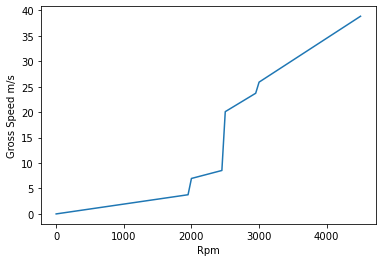

In [39]:
import matplotlib.pyplot as plt #Importing structure to formulate graph
x = rpm_lst
y= lst
plt.plot(x,y)
plt.xlabel('Rpm')
plt.ylabel('Gross Speed m/s')
plt.show()

In [28]:
#DRAG MATHS
drag_force_lst = []
for u in lst:
    p = 1.2754 #air density
    c_d = 0.33 #drag coefficient
    A = 1.85 #frontal area
    N = 0.5*p*(u**2)*c_d*A #drag formula
    drag_force_lst.append(N)
print(drag_force_lst)
    

[0.0, 0.0036405885404475554, 0.014562354161790221, 0.032765296864028, 0.058249416647160886, 0.0910147135111889, 0.131061187456112, 0.17838883848193013, 0.23299766658864354, 0.294887671776252, 0.3640588540447556, 0.4405112133941543, 0.524244749824448, 0.615259463335637, 0.7135553539277205, 0.8191324216007001, 0.9319906663545742, 1.0521300881893432, 1.179550687105008, 1.314252463101567, 1.4562354161790223, 1.6054995463373725, 1.762044853576617, 1.9258713378967571, 2.096978999297792, 2.2753678377797213, 2.461037853342548, 2.6539890459862687, 2.854221415710882, 3.0617349625163937, 3.2765296864028004, 3.4986055873701005, 3.7279626654182967, 3.964600920547388, 4.208520352757373, 4.459720962048257, 4.718202748420032, 4.9839657118727025, 5.257009852406268, 5.537335170020732, 18.930570136641172, 19.88893024980863, 20.870953575646887, 21.87664011415595, 22.905989865335815, 23.95900282918648, 25.035679005707955, 26.13601839490021, 27.26002099676329, 28.40768681129716, 157.4102795228534, 163.76965

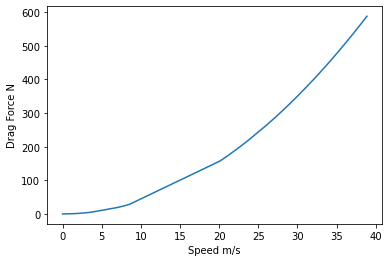

In [29]:
x = lst
y= drag_force_lst
plt.plot(x,y)
plt.xlabel('Speed m/s')
plt.ylabel('Drag Force N')
plt.show()

In [30]:
total_litres_km_lst =[]
for drag_resistance in drag_force_lst:

    work_output = drag_resistance * 1000 #work = force* distance 
    work_output /= 1000 #For KJ measurement

    efficiency = 0.28 #average of 28 percent
    fuel_energy_input = work_output / efficiency

    energy_litre = 40 #Typical MJL (Megajoules per Litre)
    drag_no_of_litres = fuel_energy_input / (energy_litre*1000)

    #rolling resistance 
    rolling_resistance_coefficient = 0.012 #typical for car
    car_mass = 1600 #reports for the mass varied from 1425-1580kg so I used an average of 1502.5 plus one and a bit passengers
    g = 9.81 #gravity rounded to 2 dp

    total_rolling_resistance = rolling_resistance_coefficient * car_mass * g * 1000 #force * distance
    total_rolling_resistance /= 1000 #Convert to KJ
    

    fuel_energy_input = total_rolling_resistance / efficiency

    energy_litre = 40 #Typical MJL
    rolling_no_of_litres = fuel_energy_input / (energy_litre*1000)

    total_litres_km = rolling_no_of_litres+ drag_no_of_litres
    
    total_litres_km_lst.append(total_litres_km)
    
print(total_litres_km_lst)


[0.016817142857142853, 0.016817467909691106, 0.016818443067335872, 0.016820068330077143, 0.01682234369791492, 0.01682526917084921, 0.016828844748880006, 0.01683307043200731, 0.016837946220231124, 0.016843472113551448, 0.016849648111968277, 0.01685647421548162, 0.016863950424091466, 0.016872076737797823, 0.016880853156600685, 0.01689027968050006, 0.01690035630949594, 0.01691108304358833, 0.01692245988277723, 0.016934486827062636, 0.016947163876444554, 0.016960491030922977, 0.01697446829049791, 0.01698909565516935, 0.0170043731249373, 0.017020300699801757, 0.017036878379762723, 0.0170541061648202, 0.017071984054974183, 0.017090512050224674, 0.017109690150571674, 0.017129518356015182, 0.0171499966665552, 0.017171125082191728, 0.01719290360292476, 0.017215332228754304, 0.017238410959680355, 0.017262139795702916, 0.017286518736821986, 0.017311547783037562, 0.01850737233362867, 0.018592940200875766, 0.01868062085496847, 0.018770414295906777, 0.018862320523690693, 0.018956339538320217, 0.0190

In [31]:
#The graph will only be relevant for speeds exceeding roughly 15 m/s. As the graph goes from 8 to 20, the only relevant data will be from 20 onwards
lst = [x for x in lst if x >15]
print(lst)
del total_litres_km_lst[0:50]

[20.10784377712891, 20.51000065267149, 20.912157528214067, 21.314314403756644, 21.716471279299224, 22.118628154841797, 22.520785030384378, 22.922941905926958, 23.325098781469535, 23.727255657012112, 25.91169868552748, 26.34356033028627, 26.77542197504506, 27.207283619803857, 27.639145264562647, 28.071006909321436, 28.502868554080226, 28.93473019883902, 29.366591843597806, 29.7984534883566, 30.230315133115393, 30.662176777874176, 31.094038422632973, 31.525900067391767, 31.957761712150557, 32.389623356909354, 32.82148500166814, 33.253346646426934, 33.685208291185724, 34.117069935944514, 34.548931580703304, 34.98079322546209, 35.412654870220884, 35.84451651497968, 36.27637815973847, 36.70823980449726, 37.14010144925606, 37.57196309401485, 38.00382473877364, 38.43568638353243, 38.86754802829122]


In [32]:
print(len(lst)) #Checking to see if both lists length are the same
print(len(total_litres_km_lst))

41
41


Approximated reduction in carbon emissions: 21.284%


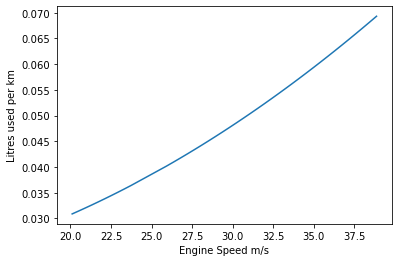

In [33]:
import numpy as np
import math
x = np.array(lst)
y = np.array(total_litres_km_lst)
plt.plot(x,y)
plt.xlabel('Engine Speed m/s')
plt.ylabel('Litres used per km')
#100km/hr = 27.778 metres per second
FuelAt100kmhr = np.interp(27.778, x,y)
#120 kmhr = 33.333 ms-1 (3dp)
FuelAt120kmhr = np.interp(33.333, x,y) #Finding correlating y axis point from x axis
PercentChange = ((FuelAt120kmhr - FuelAt100kmhr)/FuelAt120kmhr)*100 #Finding the decrease in emissions
print(f"Approximated reduction in carbon emissions: {round(PercentChange,3)}%")